In [ ]:
# AUTOENCODERS :
# input image --> encoding phase --> code --> decoding phase --> reconstructed image
# APPLICATIONS :
# 1. Noise removal
# 2. Anomaly detection
# 3. domain adaptation (eg - neural style transfer)
# 4. image colorization

In [ ]:
from keras.layers import Conv2D, UpSampling2D, Input
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb
from skimage.transform import resize
from skimage.io import imsave
import numpy as np
import tensorflow as tf

In [ ]:
# specify path to images folder
path = "/content/drive/MyDrive/Image colorizer/Images_flowers"

In [ ]:
import os
len(os.listdir('/content/drive/MyDrive/Image colorizer/Images_flowers'))
# number of images

1591

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255) # normalize images
train = train_datagen.flow_from_directory(path,
                                          target_size = (256, 256), 
                                          batch_size = 340,
                                          class_mode = None)

Found 0 images belonging to 1 classes.


In [ ]:
train

In [ ]:
# convert images from rgb to lab
# LAB images - think of it as a grey image in L channel with all color info stored
# in A and B channel. The input to the network will be the L channel, so we assign
# L channel to X vector and A and B channel to Y vector.

# L contains lightness info - b&w channel
# A axis goes from green to red
# B axis goes from blue to yellow

In [ ]:
img = load_img('/content/drive/MyDrive/Image colorizer/Train/Images_scrapped/animals12.jpg')
lab = rgb2lab(img)
L = lab[:,:,0]
A = lab[:,:,1]
B = lab[:,:,2]

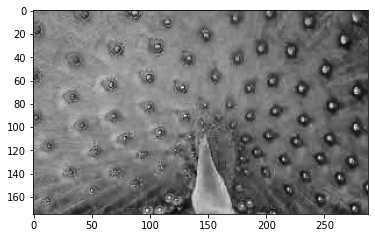

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(A, cmap = 'gray')

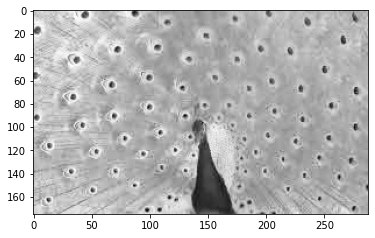

In [ ]:
plt.imshow(B, cmap = 'gray')

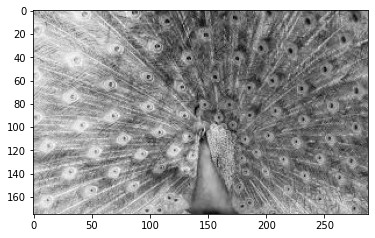

In [ ]:
plt.imshow(L, cmap = 'gray')

In [ ]:
X = []
Y = []
for img in train[0]:
    lab = rgb2lab(img)
    X.append(lab[:,:,0])
    Y.append(lab[:,:,1:]/128) # A and B values range from -127 to 128, so we divide the 
    # values by 128 to restrict values to b/w -1 and 1.
X = np.array(X)
Y = np.array(Y)
X = X.reshape(X.shape+(1,)) # dimensions to be same for X and Y
print(X.shape)
print(Y.shape)

(340, 256, 256, 1)
(340, 256, 256, 2)


In [ ]:
# ENCODER
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2, input_shape=(256, 256, 1)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(512, (3,3), activation='relu', padding='same'))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))

In [ ]:
# DECODER
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
# we are using tanh instead of relu in last layer - since we are colorizing the images in this layer using 2 filters, A and B.
# A and B values range between -1 and 1 so tanh (or hyperbolic tangent) is used as it also has the range between -1 and 1. 
# other functions go from 0 to 1
model.add(UpSampling2D((2, 2)))
model.compile(optimizer='adam', loss='mse' , metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 128, 128, 64)      640       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 64, 64, 128)       147584    
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 64, 64, 256)       295168    
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 256)       590080    
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 32, 512)       1180160   
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 512)      

In [ ]:
model.fit(X,Y,validation_split=0.1, epochs=15, batch_size=16)

Epoch 1/15
20/20 [==============================] - 8s 329ms/step - loss: 0.9099 - accuracy: 0.5906 - val_loss: 0.1779 - val_accuracy: 0.7449
Epoch 2/15
20/20 [==============================] - 6s 315ms/step - loss: 0.0764 - accuracy: 0.5799 - val_loss: 0.0240 - val_accuracy: 0.7436
Epoch 3/15
20/20 [==============================] - 6s 315ms/step - loss: 0.0273 - accuracy: 0.6274 - val_loss: 0.0230 - val_accuracy: 0.7481
Epoch 4/15
20/20 [==============================] - 6s 316ms/step - loss: 0.0263 - accuracy: 0.6278 - val_loss: 0.0219 - val_accuracy: 0.7481
Epoch 5/15
20/20 [==============================] - 6s 316ms/step - loss: 0.0262 - accuracy: 0.6278 - val_loss: 0.0219 - val_accuracy: 0.7492
Epoch 6/15
20/20 [==============================] - 6s 317ms/step - loss: 0.0260 - accuracy: 0.6283 - val_loss: 0.0214 - val_accuracy: 0.7477
Epoch 7/15
20/20 [==============================] - 6s 317ms/step - loss: 0.0259 - accuracy: 0.6307 - val_loss: 0.0231 - val_accuracy: 0.7485
Epoch 

In [ ]:
model.save('/content/drive/MyDrive/Image colorizer/colorize_autoencoder.model_1')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Image colorizer/colorize_autoencoder.model_1/assets


In [ ]:
# LOAD SAVED MODEL AND TEST ON NEW IMAGES 

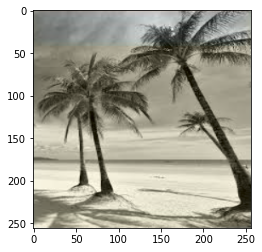

In [ ]:
img1_color = []
img1 = img_to_array(load_img('/content/drive/MyDrive/Image colorizer/Test/beach21.jpg'))
img1 = resize(img1, (256, 256))
img1_color.append(img1)

img1_color = np.array(img1_color, dtype = float)
img1_color = rgb2lab(1.0/255*img1_color)[:,:,:,0]
img1_color = img1_color.reshape(img1_color.shape+(1,))

output1 = model.predict(img1_color)
output1 = output1*128

result = np.zeros((256, 256, 3))
result[:,:,0] = img1_color[0][:,:,0]
result[:,:,1:] = output1[0]
plt.imshow(lab2rgb(result))